We import the required libraries

In [64]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Loading the data
df= pd.read_csv('planecrashinfo_20181121001952.csv')
df.head(2)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...


In [25]:
#we have to replace '?' with NaN
df.replace("?", np.nan, inplace = True)
df.head(2)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...


In [26]:
#check for where all there are missing values
df.isnull().nunique()

date            1
time            2
location        2
operator        2
flight_no       2
route           2
ac_type         2
registration    2
cn_ln           2
aboard          1
fatalities      1
ground          2
summary         2
dtype: int64

In [71]:
#plot to see which columns have most missing values
n = np.arange(13)
# x stores the data returned by isnull().value_counts() on each column
x = [[df.iloc[:,i].isnull().value_counts()]for i in range(13)]

#y stores only the "false" of the isnull().value_counts()
y = [x[i][0][0] for i in range(len(x))]
y.sort()

y

[1347, 3675, 4289, 4576, 5431, 5552, 5731, 5759, 5762, 5777, 5783, 5783, 5783]

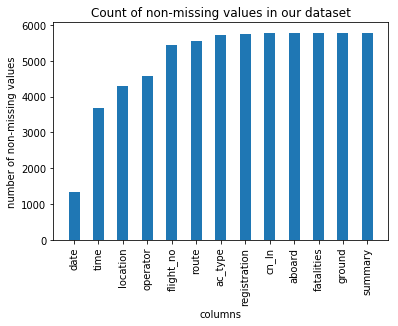

In [74]:
plt.bar(n, y, 0.45)
plt.title("Count of non-missing values in our dataset")
plt.xticks(n, df.columns, rotation =90)
plt.xlabel("columns")
plt.ylabel("number of non-missing values")
plt.show()

As we can see there are many missing values in date, time, location and operator. So let us first analyze the attributes in which there isn't much missing data.

In [38]:
df.iloc[:,1]

0         17:18
1           NaN
2         06:30
3           NaN
4       c 18:30
5       c 10:30
6       c 01:00
7       c 15:20
8           NaN
9       c 01:00
10      c 23:45
11          NaN
12      c 23:45
13          NaN
14          NaN
15      c 05:15
16      c 08:45
17          NaN
18      c 07:00
19      c 07:45
20      c 21:30
21          NaN
22      c 10:00
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
5753       1120
5754       0815
5755       0653
5756       1530
5757       1402
5758       1335
5759       1015
5760       1600
5761       0830
5762       0800
5763       1815
5764       1216
5765        NaN
5766       1731
5767       1431
5768       0926
5769       1451
5770       1908
5771      14:15
5772       1120
5773       0800
5774       1004
5775       1130
5776       1208
5777       1700
5778       0744
5779       1655
5780       1010
5781       0631
5782       0253
Name: time, Length: 5783

In [28]:
#see how many are in flight_no and registration
df.location.isnull().value_counts()
#df.registration.isnull().value_counts()

False    5777
True        6
Name: location, dtype: int64

In [30]:
df.shape

(5783, 13)

In [29]:
#we can drop the NaN values
df_nona = df.dropna()
df_nona.shape

(1202, 13)

In [32]:
df.aboard.isnull().value_counts()

False    5783
Name: aboard, dtype: int64

In [12]:
df['aboard_count'] = df["aboard"].str[0:4].str.strip()
df["aboard_count"] = pd.to_numeric(df["aboard_count"] )
# df["aboard_count"].isnull().value_counts()

In [15]:
# df["aboard_count"]

In [ ]:
df.groupby(['location', ])

In [10]:
# l1=df.summary.dropna().map(lambda x: True if "midair" in x else False  )


In [44]:
# pd.Series(df.fatalities.str[0] == '?').value_counts()

False    5772
True       11
Name: fatalities, dtype: int64